# **Wine Quality**

In [86]:
# taking imports
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier


In [87]:
#handling warnings
import warnings
warnings.filterwarnings('ignore')

In [88]:
# reading data from csv file
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [89]:
df.shape

(1599, 12)

<Axes: >

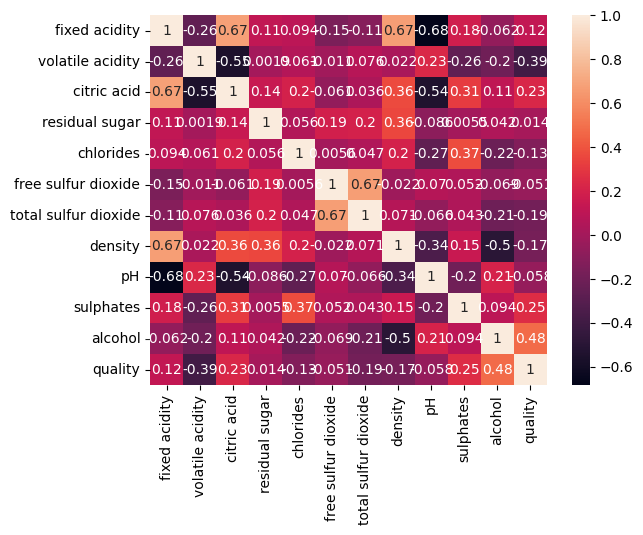

In [123]:
sns.heatmap(df.corr(), annot=True)

In [90]:
#checking for NaN values
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [91]:
# separating into X and y
X = df.drop('quality', axis=1)
y = df['quality']

<Axes: xlabel='alcohol', ylabel='quality'>

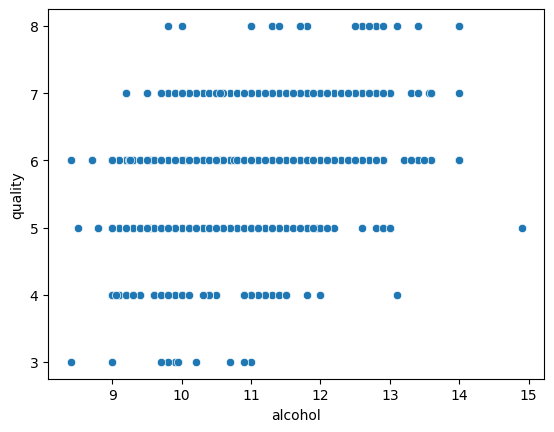

In [92]:
sns.scatterplot(data=df, x='alcohol', y='quality')

# Implementing RandomizedSearchCV

1. Logistic Regression

In [93]:
rs= RandomizedSearchCV(LogisticRegression(multi_class='multinomial', max_iter=500), {'C':[1,5,10,15]}, cv=5)
rs.fit(X,y)
rs.best_score_

0.5847452978056427

In [94]:
rs.best_params_

{'C': 10}

2. Decision Tree Classifier

In [104]:
rs= RandomizedSearchCV(tree.DecisionTreeClassifier(), { 'criterion': ['gini','log loss', 'entropy'], 'max_depth': [None, 2, 4, 6, 8],'min_samples_split': [2, 5, 10],  'min_samples_leaf': [1, 2, 4]} , cv=5)
rs.fit(X,y)
rs.best_score_

0.5522413793103448

In [105]:
rs.best_params_

{'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_depth': 4,
 'criterion': 'gini'}








3. K-Nearest Neighbours

In [118]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)
rs = RandomizedSearchCV(KNeighborsClassifier(), { 'n_neighbors': [3, 5, 7, 9],'weights': ['uniform', 'distance'],'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}, cv=5, scoring='accuracy')
rs.fit(X_train, y_train)
rs.best_score_

0.605186887254902

In [119]:
rs.best_params_

{'weights': 'distance', 'n_neighbors': 9, 'algorithm': 'kd_tree'}

4. Random Forest Classifier

In [110]:
rs= RandomizedSearchCV(RandomForestClassifier(), { 'criterion': ['gini', 'entropy'], 'max_depth': [None, 2, 4, 6, 8],'min_samples_split': [2, 5, 10],  'min_samples_leaf': [1, 2, 4]} , cv=5)
rs.fit(X,y)
rs.best_score_

0.5978820532915361

In [111]:
rs.best_params_

{'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_depth': None,
 'criterion': 'gini'}

# Selecting best model

Using RandomizedSearchCV we can say that KNN model worked best on the training data out of the 4 models.
Now we will implement KNN on testing data.

In [121]:
rs = RandomizedSearchCV(KNeighborsClassifier(), {'n_neighbors': [3, 5, 7, 9, 12, 20],'weights': ['uniform', 'distance'],'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}, cv=5, scoring='accuracy')
rs.fit(X_test, y_test)
rs.best_score_


0.5903186274509804